Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'revenue', 'top_category',
       'leaf_category'],
      dtype='object')


C:\Users\AKASH KRITHIK\AppData\Local\Temp\ipykernel_19844\1015622804.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_leaf_categories.values, y=top_leaf_categories.index, palette="viridis")


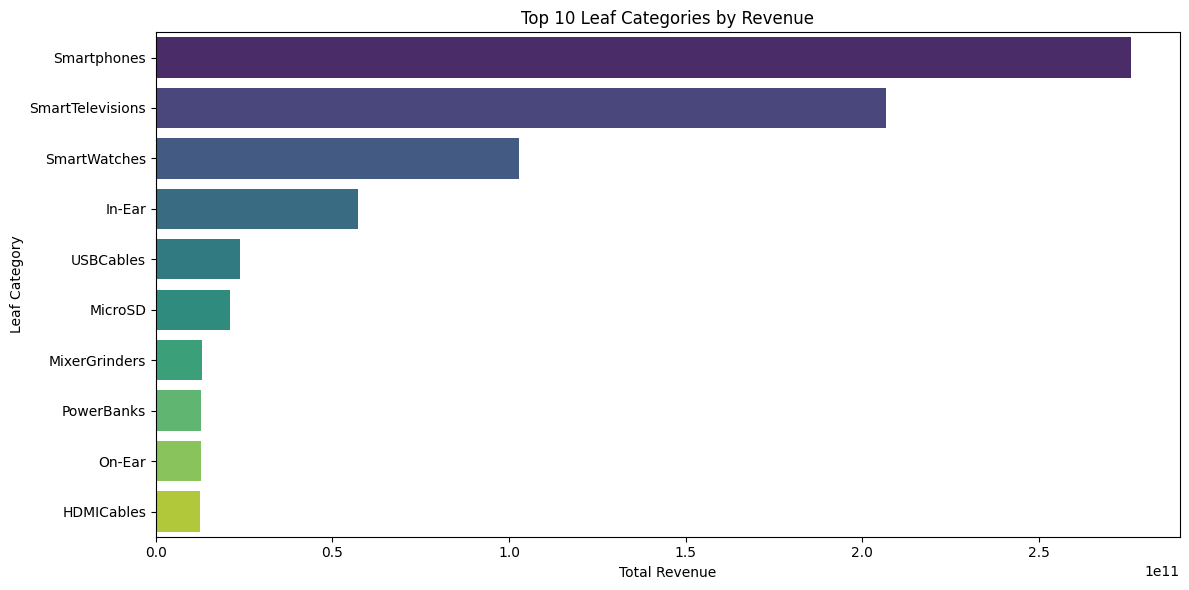

C:\Users\AKASH KRITHIK\AppData\Local\Temp\ipykernel_19844\1015622804.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="magma")


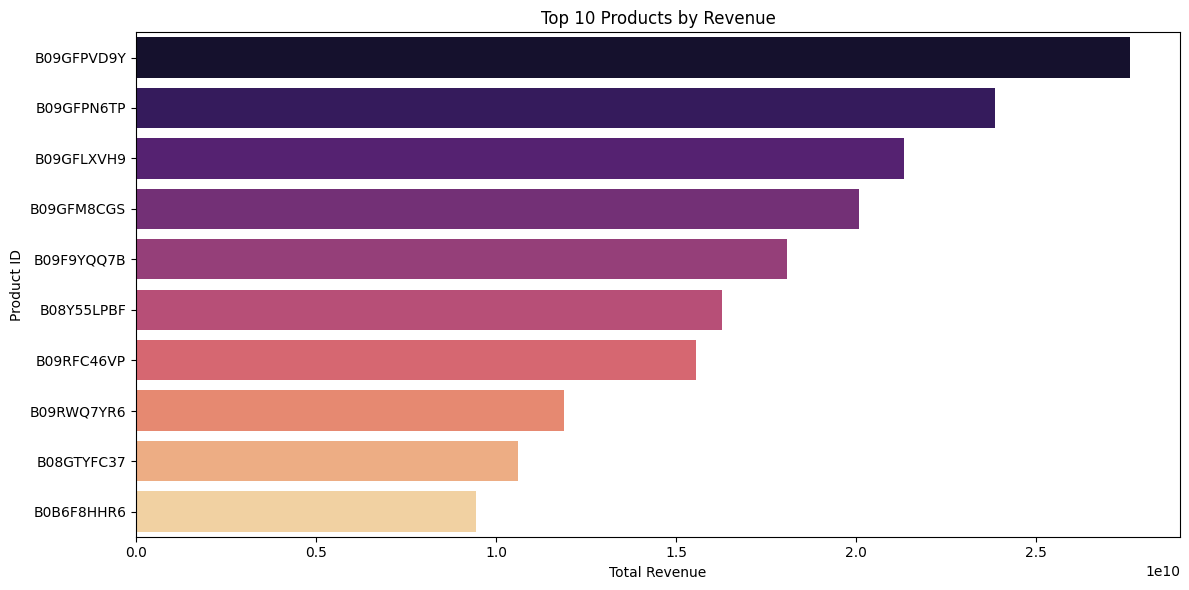

C:\Users\AKASH KRITHIK\AppData\Local\Temp\ipykernel_19844\1015622804.py:75: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))


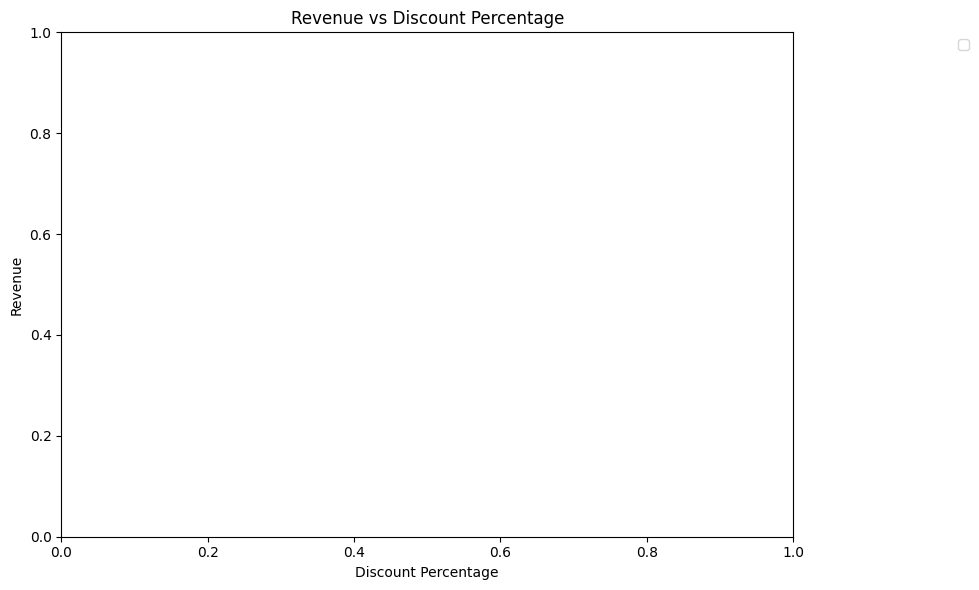

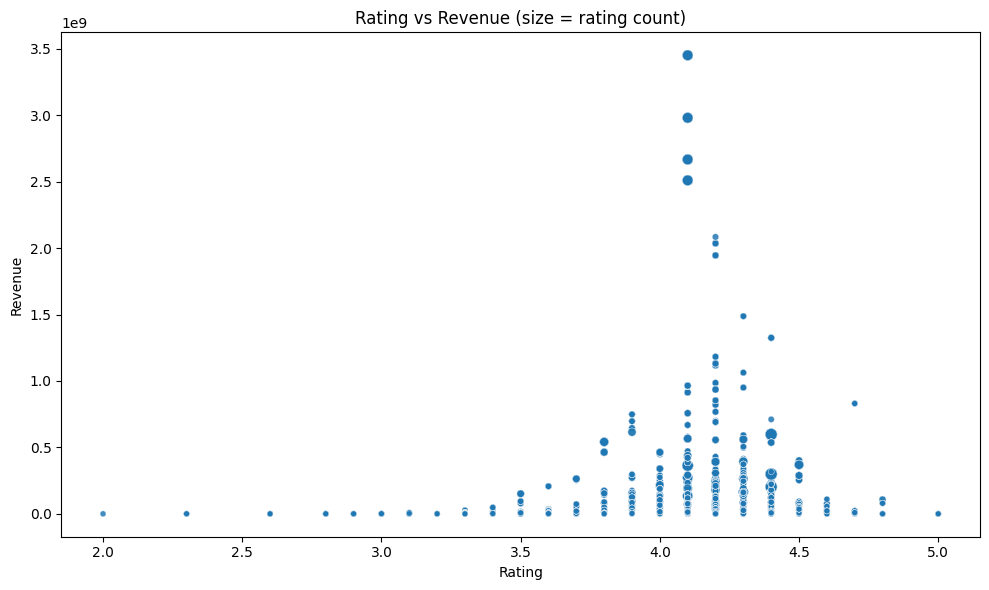

KeyError: 'order_date'

In [27]:
# During which months do sales peak?
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
file_path = r"C:\Users\AKASH KRITHIK\Desktop\Amazon Sales Data Analysis\cleaned_amazon_data.csv"
df = pd.read_csv(file_path)
# print(df.columns)

# Convert numeric fields
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['discount_percentage_cleaned'] = df['discount_percentage'].str.replace('%', '').astype(float)

 # Convert relevant columns to numeric if needed
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# --- 1. Top 10 Categories by Revenue ---
# --- Convert date column to datetime (adjust 'date' to your actual column name) ---
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['month'] = df['date'].dt.month_name()
    # --- Monthly Sales Trend ---
    monthly_revenue = df.groupby('month')['revenue'].sum()
    monthly_revenue = monthly_revenue.reindex([
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ])

    plt.figure(figsize=(12, 6))
    sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='coolwarm')
    plt.xticks(rotation=45)
    plt.title("Monthly Revenue Trend – Peak Sales Months")
    plt.xlabel("Month")
    plt.ylabel("Total Revenue")
    plt.tight_layout()
    plt.savefig("monthly_revenue_trend.png")
    plt.show()

# --- Top 10 Categories by Revenue ---
top_leaf_categories = df.groupby('leaf_category')['revenue'].sum().sort_values(ascending=False).head(10)
# print(df.groupby('leaf_category')['revenue'].sum().sort_values(ascending=False).head(20))

plt.figure(figsize=(12, 6))
sns.barplot(x=top_leaf_categories.values, y=top_leaf_categories.index, palette="viridis")
plt.title("Top 10 Leaf Categories by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Leaf Category")
plt.tight_layout()
plt.savefig("top_leaf_categories_by_revenue.png")
plt.show()


# --- Top 10 Products by Revenue ---
top_products = df.groupby('product_id')['revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product ID")
plt.tight_layout()
plt.savefig("top_products_by_revenue.png")
plt.show()

# --- Revenue vs Discount Percentage ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='discount_percentage', y='revenue', hue='top_category', alpha=0.7)
plt.title("Revenue vs Discount Percentage")
plt.xlabel("Discount Percentage")
plt.ylabel("Revenue")
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.savefig("revenue_vs_discount.png")
plt.show()

# --- Rating vs Revenue ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='rating', y='revenue', size='rating_count', alpha=0.6, legend=False)
plt.title("Rating vs Revenue (size = rating count)")
plt.xlabel("Rating")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("rating_vs_revenue.png")
plt.show()



# Convert to datetime and extract month
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['month'] = df['order_date'].dt.month_name()

# Map months to seasons
season_map = {
    'January': 'Winter', 'February': 'Winter', 'March': 'Spring',
    'April': 'Spring', 'May': 'Spring', 'June': 'Summer',
    'July': 'Summer', 'August': 'Summer', 'September': 'Fall',
    'October': 'Fall', 'November': 'Fall', 'December': 'Winter'
}
df['season'] = df['month'].map(season_map)

# Group and plot
seasonal_revenue = df.groupby('season')['revenue'].sum().reindex(['Winter', 'Spring', 'Summer', 'Fall'])


